# 고차원의 저주..

> 고차원 공간은 우리가 직관적으로 이해하지 못하는 이상한 특징을 많이 가지고 있다. 예를 들어 이미지 데이터의 픽셀 값을 데이터로 받는다면 픽셀수가 데이터의 차원이 된다. 이렇게 고차원이 되면 우리가 직관적으로 이해할 수 없는 특징이 생기고, 결과적으로 알고리즘이 잘 작동하지 않는다. 이게 바로 **고차원의 저주**이다.

> 고차원 공간에서는 표본간의 거리가 매우 멀다.

In [1]:
import numpy
import scipy.spatial.distance

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = r'D:/font/NanumBarunpenB.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

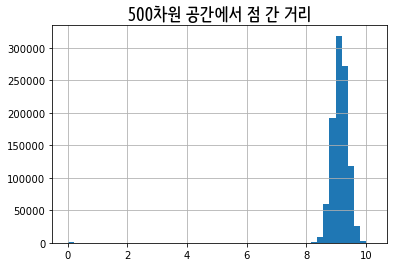

In [4]:
d = 500
data = numpy.random.uniform(size=d*1000).reshape((1000, d))
distances = scipy.spatial.distance.cdist(data, data)
pd.Series(distances.reshape(1000000)).hist(bins=50)
plt.title("%i차원 공간에서 점 간 거리" %d, fontproperties = fontprop)
plt.show()

# 아이겐 페이스와 차원축소

### 데이터
> 40명의 64 * 64 픽셀의 얼굴 이미지 파일을 1명당 10장씩 불러온다. 이 데이터는 64 * 64 = 4096차원 데이터이다.

In [7]:
import sklearn
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import metrics

In [8]:
# 데이터 불러오기
face_data = datasets.fetch_olivetti_faces()
person_ids, image_array = face_data['target'], face_data.images
person_ids

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [9]:
image_array

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [10]:
# (64, 64) 크기의 데이터를 (4096, )으로 변환
X = image_array.reshape((len(person_ids), 64*64))

In [11]:
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [12]:
X.shape

(400, 4096)

In [13]:
# 군집화 알고리즘 실행
print("** 원본 데이터 군집화 결과")
model = KMeans(n_clusters=40)
model.fit(X)

print("군집화 성능 : ", silhouette_score(X, model.labels_))
print("얼굴 일치율 : ", metrics.adjusted_rand_score(model.labels_, person_ids))

** 원본 데이터 군집화 결과
군집화 성능 :  0.14779206
얼굴 일치율 :  0.37980420118809116


In [14]:
# 주성분 분석 수행
print("** 주성분 분석 후 군집화 결과")
pca = PCA(25) # 주성분은 25차원
pca.fit(X)
X_reduced = pca.transform(X)
model_reduced = KMeans(n_clusters=40)
model_reduced.fit(X_reduced)
labels_reduced = model_reduced.labels_
print("군집화 성능 : ", silhouette_score(X_reduced, model_reduced.labels_))
print("얼굴 일치율 : ", metrics.adjusted_rand_score(model_reduced.labels_, person_ids))

** 주성분 분석 후 군집화 결과
군집화 성능 :  0.23836529
얼굴 일치율 :  0.44757638661276816


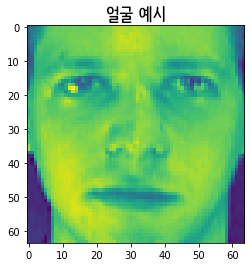

In [15]:
# 이미지를 직접 보며 결과를 확인
sample_face = image_array[0,:,:]
plt.imshow(sample_face)
plt.title("얼굴 예시", fontproperties = fontprop)
plt.show()

# 아이겐 페이스??

> 주성분의 분석의 결과로 나온 얼굴 사진의 가장 중요한 특징을 뽑아서 재구성한 얼굴이다. 

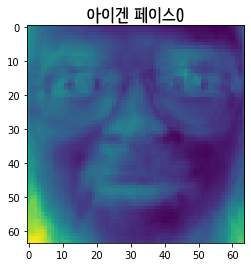

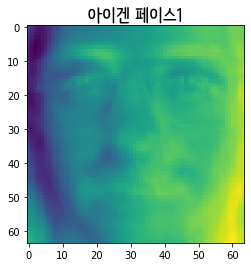

In [19]:
# 아이겐 페이스 0 (첫번쨰 주성분)

eigenface0 = pca.components_[0,:].reshape((64, 64))
plt.imshow(eigenface0)
plt.title("아이겐 페이스0", fontproperties = fontprop)
plt.show()

# 아이겐 페이스 1

eigenface1 =  pca.components_[1,:].reshape((64, 64))
plt.imshow(eigenface1)
plt.title("아이겐 페이스1", fontproperties = fontprop)
plt.show()